In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

athlete_data = "athlete_events.csv"
gdp_data = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_103640.csv"

In [2]:
athlete_data_pd = pd.read_csv(athlete_data)
athlete_data_pd.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:

gdp_pd = pd.read_csv(gdp_data)
gdp_pd.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.057510e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09


In [4]:
#remove unessesay years and years we don't want for olymics. 
#gdp_pd = gdp_pd.drop(columns = ["1960"])#"1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                               #"1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1985",
                               #"1986","1987","1989","1990","1991","1993","1994","1995","1997","1998","1999","2001","2002",
                               #"2003","2005","2006","2007","2009","2010","2011","2013","2014","2015","2017","2018"])
# gdp_pd = gdp_pd.drop(columns = ["1960"])
# gdp_pd
gdp_pd_filtered = gdp_pd.filter(["Country Name","1988","1992",
                       "1996","2000","2004","2008","2012","2016"])
gdp_pd_filtered.head()

#Germany Japan, US, Uguand, Kenya, Euthopeia. 

#look at graph for percapita, and getting a population size.
# extract just the african countries and the other ones we want. 
gdp_pd_filtered_indexed = gdp_pd_filtered.set_index("Country Name")

gdp_pd_filtered_countries = gdp_pd_filtered_indexed.loc[["United States","Germany", "Japan", "Uganda","Kenya", "Ethiopia"]]
#transpose thecolumbs and the rows
gdp_pd_filtered_countries_tranposed = gdp_pd_filtered_countries.T
gdp_pd_filtered_countries_tranposed

Country Name,United States,Germany,Japan,Uganda,Kenya,Ethiopia
1988,5.236440e+12,1.395930e+12,3.071680e+12,6.508932e+09,8.355381e+09,1.090894e+10
1992,6.520330e+12,2.123130e+12,3.908810e+12,2.857458e+09,8.209129e+09,1.049299e+10
1996,8.073120e+12,2.503670e+12,4.833710e+12,6.044585e+09,1.204586e+10,8.547940e+09
2000,1.025230e+13,1.949950e+12,4.887520e+12,6.193247e+09,1.270536e+10,8.242392e+09
2004,1.221370e+13,2.819250e+12,4.815150e+12,7.940363e+09,1.609534e+10,1.013119e+10
2008,1.471280e+13,3.752370e+12,5.037910e+12,1.423903e+10,3.589515e+10,2.706691e+10
2012,1.619700e+13,3.543980e+12,6.203210e+12,2.311429e+10,5.041275e+10,4.331072e+10
2016,1.870720e+13,3.495160e+12,4.926670e+12,2.413366e+10,6.918876e+10,7.427128e+10


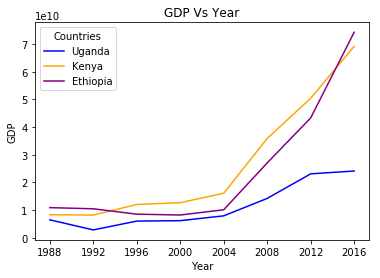

In [5]:
### create a line graph of the data fro GDP on afircan countries. 
years =  list(gdp_pd_filtered_countries_tranposed.index)
#plt.plot(years,gdp_pd_filtered_countries_tranposed["United States"], color = 'g')
#plt.plot(years,gdp_pd_filtered_countries_tranposed["Germany"], color = 'r')
#plt.plot(years,gdp_pd_filtered_countries_tranposed["Japan"], color = 'y')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Uganda"], color = 'b')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Kenya"], color = 'orange')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Ethiopia"], color = 'purple')

plt.ylabel("GDP")
plt.xlabel("Year")
plt.title("GDP Vs Year")
lgnd = plt.legend(["Uganda","Kenya","Ethiopia"],loc="upper left", scatterpoints=1, fontsize=10, title = "Countries")

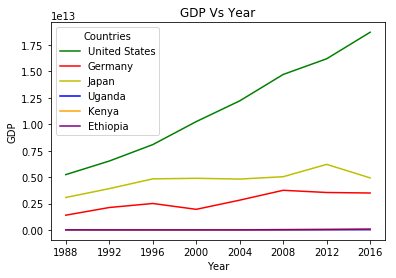

In [6]:
### create a line graph of the data fro GDP on afircan countries. 
years =  list(gdp_pd_filtered_countries_tranposed.index)
plt.plot(years,gdp_pd_filtered_countries_tranposed["United States"], color = 'g')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Germany"], color = 'r')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Japan"], color = 'y')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Uganda"], color = 'b')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Kenya"], color = 'orange')
plt.plot(years,gdp_pd_filtered_countries_tranposed["Ethiopia"], color = 'purple')

plt.ylabel("GDP")
plt.xlabel("Year")
plt.title("GDP Vs Year")
lgnd = plt.legend(["United States","Germany","Japan","Uganda","Kenya","Ethiopia"],loc="upper left", scatterpoints=1, fontsize=10, title = "Countries")

In [7]:
athlete_data_pd_sport_athletics = athlete_data_pd[athlete_data_pd["Sport"] == "Athletics"]
athlete_data_pd_sport_gold = athlete_data_pd[athlete_data_pd['Medal'] == "Gold"]
athlete_data_pd_sport_gold.head()
athlete_data_pd_sport_athletics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN


In [8]:
athlete_data_2016 = athlete_data_pd[athlete_data_pd["Year"] == 2016]
athlete_data_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [10]:
# create a graph of countries and the number of medals they won for all events.

list_of_counties2 = []
number_of_metals2 = []
countryname3 = []
x = 0
for index, row in athlete_data_2016.iterrows():
    country_name = str(row['Team'])
    countryname3.append(country_name)
    if row['Medal'] == "Silver" or row['Medal'] == "Gold" or row['Medal'] == "Bronze":
        if country_name in list_of_counties2:
        #find position where country is located.
            position = list_of_counties2.index(country_name)
            #increase that metal spot by one in the index
            number_of_metals2[position] = number_of_metals2[position] + 1
        else:
            #put the countries in 
            list_of_counties2.append(country_name)
            #put the first number in 
            number_of_metals2.append(1)

In [11]:
countries_with_medals_GDP2 = []
countries_with_medals3 = []
number_of_metals3 = []

i = 0    
for countryname3 in list_of_counties2:
    for index, row in gdp_pd.iterrows():
        country_name = str(row['Country Name'])
        
        if country_name == countryname3:
            #put the GDP in the row
            #country_name3 = str(row['2016'])
            countries_with_medals_GDP2.append(str(row['2016']))
            position = list_of_counties2.index(country_name)
            countries_with_medals3.append(country_name)
            number_of_metals3.append(number_of_metals2[position])

In [12]:
# create a graph of countries and the number of medals they won THIS IS JUST FOR RUNNING EVENTS
athlete_data_2016_run = athlete_data_2016[athlete_data_2016["Sport"] == "Athletics"]
list_of_counties = []
number_of_metals = []
countryname2 = []
x = 0
for index, row in athlete_data_2016_run.iterrows():
    country_name = str(row['Team'])
    countryname2.append(country_name)
    if row['Medal'] == "Silver" or row['Medal'] == "Gold" or row['Medal'] == "Bronze":
        if country_name in list_of_counties:
        #find position where country is located.
            position = list_of_counties.index(country_name)
            #increase that metal spot by one in the index
            number_of_metals[position] = number_of_metals[position] + 1
        else:
            #put the countries in 
            list_of_counties.append(country_name)
            #put the first number in 
            number_of_metals.append(1)

In [13]:
gdp_easy2 = []
for number in countries_with_medals_GDP2:
    x = float(number)
    gdp_easy2.append(x/1000000000)
    

gpd_medals_data2 = pd.DataFrame({"Country Name":countries_with_medals3,"Number of Medals":number_of_metals3,
                               "GDP":gdp_easy2})

african_countries2 = gpd_medals_data2.set_index("Country Name")
african_countries2 = african_countries2.loc[["South Africa","Kenya","Ethiopia"]]
african_countries2

,Number of Medals,GDP
Country Name,,
South Africa,23,295.747000
Kenya,13,69.188756
Ethiopia,8,74.271282


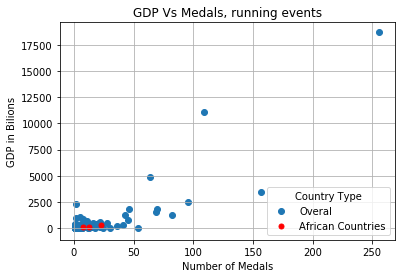

In [16]:
plt.scatter(number_of_metals3,gdp_easy2)
plt.scatter(african_countries2["Number of Medals"],african_countries2["GDP"], s = 25, color = "Red")
plt.ylabel("GDP in Bilions")
plt.xlabel("Number of Medals")
plt.title("GDP Vs Medals, running events")
plt.grid("True")
lgnd = plt.legend(["Overal","African Countries",],loc="lower right", scatterpoints=1, fontsize=10, title = "Country Type")

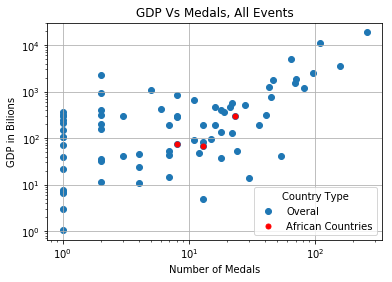

In [15]:
plt.scatter(number_of_metals3,gdp_easy2)
plt.scatter(african_countries2["Number of Medals"],african_countries2["GDP"], s = 25, color = "Red")
plt.ylabel("GDP in Bilions")
plt.xlabel("Number of Medals")
plt.title("GDP Vs Medals, All Events")
plt.yscale("log")
plt.xscale("log")
plt.grid("True")
lgnd = plt.legend(["Overal","African Countries",],loc="lower right", scatterpoints=1, fontsize=10, title = "Country Type")

#put in a grid

In [17]:
#o through and find respective contires GDP. 
countries_with_medals_GDP = []
countries_with_medals2 = []
number_of_metals2 = []

i = 0    
for country_name2 in list_of_counties:
    for index, row in gdp_pd.iterrows():
        country_name = str(row['Country Name'])
        
        if country_name == country_name2:
            #put the GDP in the row
            #country_name3 = str(row['2016'])
            countries_with_medals_GDP.append(str(row['2016']))
            position = list_of_counties.index(country_name)
            countries_with_medals2.append(country_name)
            number_of_metals2.append(number_of_metals[position])

In [18]:
gdp_easy = []
for number in countries_with_medals_GDP:
    x = float(number)
    gdp_easy.append(x/1000000000)
    

gpd_medals_data = pd.DataFrame({"Country Name":countries_with_medals2,"Number of Medals":number_of_metals2,
                               "GDP":gdp_easy})


gpd_medals_data.head()

african_countries = gpd_medals_data.set_index("Country Name")
african_countries = african_countries.loc[["South Africa","Kenya","Ethiopia"]]
african_countries

,Number of Medals,GDP
Country Name,,
South Africa,4,295.747000
Kenya,13,69.188756
Ethiopia,8,74.271282


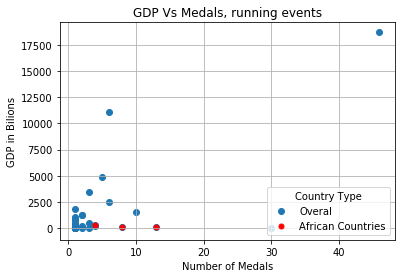

In [19]:
plt.scatter(number_of_metals2,gdp_easy)
plt.scatter(african_countries["Number of Medals"],african_countries["GDP"], s = 25, color = "Red")
plt.ylabel("GDP in Bilions")
plt.xlabel("Number of Medals")
plt.title("GDP Vs Medals, running events")
plt.grid("True")
lgnd = plt.legend(["Overal","African Countries",],loc="lower right", scatterpoints=1, fontsize=10, title = "Country Type")

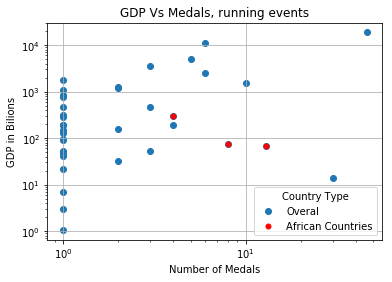

In [20]:
plt.scatter(number_of_metals2,gdp_easy)
plt.scatter(african_countries["Number of Medals"],african_countries["GDP"], s = 25, color = "Red")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("GDP in Bilions")
plt.xlabel("Number of Medals")
plt.title("GDP Vs Medals, running events")
plt.grid("True")
lgnd = plt.legend(["Overal","African Countries",],loc="lower right", scatterpoints=1, fontsize=10, title = "Country Type")

In [21]:
# plt.scatter(athlete_data_pd_sport_gold["Year"],athlete_data_pd_sport_gold["Age"])
athlete_data_pd_sport_gold_country = athlete_data_pd_sport_gold.groupby(["Year"])
athlete_data_pd_sport_gold_country = athlete_data_pd_sport_gold_country.count()
athlete_data_pd_sport_gold_country.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,,
1896,62,62,62,52,13,13,62,62,62,62,62,62,62,62
1900,201,201,201,179,27,21,201,201,201,201,201,201,201,201
1904,173,173,173,160,51,45,173,173,173,173,173,173,173,173
1906,157,157,157,126,32,29,157,157,157,157,157,157,157,157
1908,294,294,294,285,67,80,294,294,294,294,294,294,294,294
